In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    sci

Let's get the Dataset as per our ruquirement:

,the_geom,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60670812560372 41.81681377...,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157
1,MULTIPOLYGON (((-87.62760697485348 41.87437097...,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156
2,MULTIPOLYGON (((-87.66706868914602 41.88885187...,United Center,UNITED CENTER,3.252051e+07,23101.363745
3,MULTIPOLYGON (((-87.65833494805533 41.92166144...,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745
4,MULTIPOLYGON (((-87.74059567509266 41.88782316...,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351


Index(['the_geom', 'PRI_NEIGH', 'SEC_NEIGH', 'SHAPE_AREA', 'SHAPE_LEN'], dtype='object')

In [2]:
data = requests.get("https://en.wikipedia.org/wiki/Category:Suburbs_in_Chicago").text

In [3]:
ccrimedf = pd.read_csv('Chicago_Crime.csv')

In [10]:
ccrimedf.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [11]:
ccrimedf.shape

(533, 22)

In [12]:
ccrimedf.columns

Index(['ID', 'CASE_NUMBER', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY_TYPE',
       'DESCRIPTION', 'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT',
       'DISTRICT', 'WARD', 'COMMUNITY_AREA_NUMBER', 'FBICODE', 'X_COORDINATE',
       'Y_COORDINATE', 'YEAR', 'UPDATEDON', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

Now we can clean data and retain as per our need:

In [13]:
crdf = ccrimedf.loc[:,['COMMUNITY_AREA_NUMBER','PRIMARY_TYPE','LATITUDE','LONGITUDE']]

In [14]:
crdf.head()

,COMMUNITY_AREA_NUMBER,PRIMARY_TYPE,LATITUDE,LONGITUDE
0,58.0,THEFT,41.807441,-87.703956
1,23.0,THEFT,41.898280,-87.716406
2,38.0,THEFT,41.815933,-87.624642
3,46.0,THEFT,41.743665,-87.562463
4,66.0,THEFT,41.773455,-87.706480


In [15]:
 groupdf = crdf.groupby(['COMMUNITY_AREA_NUMBER'])

In [ ]:
groupdf.head(5)

In [17]:
crdf.shape

(533, 4)

In [18]:
gcdf = crdf['COMMUNITY_AREA_NUMBER'].groupby

Lel's get some Dataset of Chicago Census:

In [19]:
chicen = pd.read_csv('Census.csv')

In [20]:
chicen

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


We will keep data as per our need:

In [21]:
com_area = chicen.loc[:,['COMMUNITY_AREA_NUMBER','COMMUNITY_AREA_NAME']]

In [22]:
com_area.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME
0,1.0,Rogers Park
1,2.0,West Ridge
2,3.0,Uptown
3,4.0,Lincoln Square
4,5.0,North Center


In [23]:
mer_df = pd.merge( com_area,crdf, on='COMMUNITY_AREA_NUMBER')

In [24]:
mer_df.dropna(subset=["COMMUNITY_AREA_NUMBER"], axis=0, inplace=True)

In [25]:
mer_df.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PRIMARY_TYPE,LATITUDE,LONGITUDE
0,1.0,Rogers Park,THEFT,42.007012,-87.677996
1,1.0,Rogers Park,CRIMINAL DAMAGE,42.012698,-87.671159
2,1.0,Rogers Park,NARCOTICS,42.021178,-87.672208
3,1.0,Rogers Park,OTHER OFFENSE,42.011796,-87.672339
4,1.0,Rogers Park,DECEPTIVE PRACTICE,42.019383,-87.672753


In [26]:
new_df = mer_df.groupby(['COMMUNITY_AREA_NUMBER'])

In [ ]:
new_df.head()

There are 78 Comminity areas in Chicago. We will short our list and keep 10 selected Community areas (neighborhoods) for our analisys:

In [13]:
data = [['RogersPark', 42.007012, -87.677996, 1000], ['WestRidge', 42.008751, -87.699768, 1000], ['Uptown', 41.969826, -87.657637, 1000], ['LincolnSquare', 41.969389, -87.700489, 1000
], ['LakeView', 41.939539, -87.644384, 1000], ['LincolnPark', 41.925098, -87.672294, 1000], ['NorthSide', 41.897983, -87.624096, 1000], ['WestSide', 41.865761, -87.646876, 1000], ['Loop', 41.881598, -87.627758, 1000
], ['South Side', 41.84686, -87.617324, 1000]] 

In [14]:
chicagodf = pd.DataFrame(data, columns = ['Neighborhood', 'latitude', 'longitude','radius']) 

In [15]:
chicagodf

,Neighborhood,latitude,longitude,radius
0,RogersPark,42.007012,-87.677996,1000
1,WestRidge,42.008751,-87.699768,1000
2,Uptown,41.969826,-87.657637,1000
3,LincolnSquare,41.969389,-87.700489,1000
4,LakeView,41.939539,-87.644384,1000
5,LincolnPark,41.925098,-87.672294,1000
6,NorthSide,41.897983,-87.624096,1000
7,WestSide,41.865761,-87.646876,1000
8,Loop,41.881598,-87.627758,1000
9,South Side,41.846860,-87.617324,1000


Get Location of Chicago City to create general map of city with neighborhoods marks:

In [8]:
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="il_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago City are {},  {}.'.format(latitude,longitude))

The geograpical coordinate of Chicago City are 41.8755616,  -87.6244212.


In [9]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood in zip(chicagodf['latitude'], chicagodf['longitude'], chicagodf['Neighborhood']):
    label = '{},'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

In [16]:
chicagodf.shape

(10, 4)

Create credential to get help of FourSquare API:

In [11]:
CLIENT_ID = 'H3HDH2VOPLCB5T05U0KUXSTF2O2MX2X3R0F4NBCYNV1OA5SF' # your Foursquare ID
CLIENT_SECRET = 'LHTBY4GDMWBMOGKWH4CHZADVS14PM5SYVUZZCC5Z5N0DGXBS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H3HDH2VOPLCB5T05U0KUXSTF2O2MX2X3R0F4NBCYNV1OA5SF
CLIENT_SECRET:LHTBY4GDMWBMOGKWH4CHZADVS14PM5SYVUZZCC5Z5N0DGXBS


In [12]:
LIMIT =100
radius = 1000

We will get data of restaurants as well Veg restaurants in our selected neighborhoods of Chicago:

In [17]:
def get_restaurant_counts(names, lat, long, radius):
    restaurant_list=[]
    for name, lat, lng, radius in zip(names, lat, long, radius):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        restaurant_list.append([(
            name,  
            v['venue']['categories'][0]['name'],
            1 if 'Vegan' in v['venue']['categories'][0]['name'] else 0,
            1 if 'Restaurant' in v['venue']['categories'][0]['name'] else 0)
            for v in results])

    nearby_restaurants = pd.DataFrame([item for venue_list in restaurant_list for item in venue_list])
    nearby_restaurants.columns = ['Neighborhood', 'Category', 'Number Veg Restaurants', 'Number Restaurants']
    
    restaurant_counts = nearby_restaurants.groupby(by='Neighborhood').sum()
    
    return(restaurant_counts)

In [19]:
df_veg_count = get_restaurant_counts(names=chicagodf.Neighborhood, lat=chicagodf['latitude'], long=chicagodf['longitude'], radius=chicagodf['radius'])
df_veg_count.head(10)

,Number Veg Restaurants,Number Restaurants
Neighborhood,,
LakeView,2,33
LincolnPark,0,13
LincolnSquare,0,29
Loop,2,18
NorthSide,0,24
RogersPark,0,24
South Side,0,10
Uptown,1,35
WestRidge,0,8


In [20]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [21]:
# step 1: get the data
df_rest = df_veg_count.loc[:,['Number Restaurants']]
df_rest.head(10)

,Number Restaurants
Neighborhood,
LakeView,33
LincolnPark,13
LincolnSquare,29
Loop,18
NorthSide,24
RogersPark,24
South Side,10
Uptown,35
WestRidge,8


We will create vertical Bar plot for this data of restaurants in neighborhoods. So we can easily Visualize it.

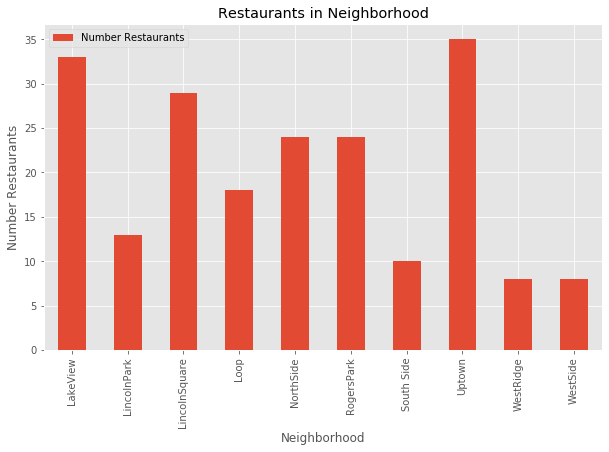

In [22]:
# step 2: plot data
df_rest.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number Restaurants') # add y-label to the plot
plt.title('Restaurants in Neighborhood') # add title to the plot

plt.show()

We will create Box plot to compare total restaurants with only Veg restaurants in neighborhoods:

In [23]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

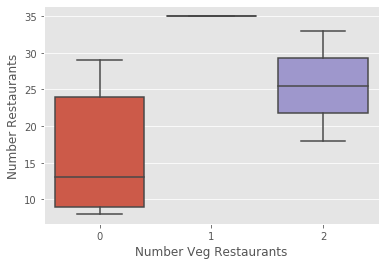

In [24]:
sns.boxplot(x="Number Veg Restaurants", y="Number Restaurants", data=df_veg_count)

Now Let's explore first neighborhood with the help of FourSquare to get all venues:

In [25]:
chicagodf.loc[0, 'Neighborhood']

'RogersPark'

In [26]:
chicagodf_latitude = chicagodf.loc[0, 'latitude'] # neighborhood latitude value
chicagodf_longitude = chicagodf.loc[0, 'longitude'] # neighborhood longitude value

chicagodf_Neighborhood = chicagodf.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(chicagodf_Neighborhood, 
                                                               chicagodf_latitude, 
                                                               chicagodf_longitude))

Latitude and longitude values of RogersPark are 42.007012, -87.677996.


In [27]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)


In [ ]:
results = requests.get(url).json()
results

Long output has been cleared (for your convenience)

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']

#
    
nearby_venues = json_normalize(results) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Auditorium Theatre,Theater,41.876058,-87.625303
1,Cafecito,Cuban Restaurant,41.875724,-87.626386
2,Osaka Sushi Express & Fresh Fruit Smoothies,Sushi Restaurant,41.876969,-87.624534
3,Hostelling International Chicago,Hostel,41.875757,-87.626537
4,Dunkin',Donut Shop,41.876768,-87.624575


In [32]:
print(nearby_venues.shape[0])

100


Now we will get nearby venues for all selected 10 neighborhoods of Chicago:

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
# type your answer her
chicago_venues = getNearbyVenues(names=chicagodf['Neighborhood'],
                                   latitudes=chicagodf['latitude'],
                                   longitudes=chicagodf['longitude']
                                  )

chicago_venues.head()

RogersPark
WestRidge
Uptown
LincolnSquare
LakeView
LincolnPark
NorthSide
WestSide
Loop
South Side


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,RogersPark,42.007012,-87.677996,Auditorium Theatre,41.876058,-87.625303,Theater
1,RogersPark,42.007012,-87.677996,Cafecito,41.875724,-87.626386,Cuban Restaurant
2,RogersPark,42.007012,-87.677996,Osaka Sushi Express & Fresh Fruit Smoothies,41.876969,-87.624534,Sushi Restaurant
3,RogersPark,42.007012,-87.677996,Hostelling International Chicago,41.875757,-87.626537,Hostel
4,RogersPark,42.007012,-87.677996,Dunkin',41.876768,-87.624575,Donut Shop


In [36]:
nearby_venues.head()

,name,categories,lat,lng
0,Auditorium Theatre,Theater,41.876058,-87.625303
1,Cafecito,Cuban Restaurant,41.875724,-87.626386
2,Osaka Sushi Express & Fresh Fruit Smoothies,Sushi Restaurant,41.876969,-87.624534
3,Hostelling International Chicago,Hostel,41.875757,-87.626537
4,Dunkin',Donut Shop,41.876768,-87.624575


In [37]:
nearby_venues.columns

Index(['name', 'categories', 'lat', 'lng'], dtype='object')

In [38]:
chicago_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,RogersPark,42.007012,-87.677996,Auditorium Theatre,41.876058,-87.625303,Theater
1,RogersPark,42.007012,-87.677996,Cafecito,41.875724,-87.626386,Cuban Restaurant
2,RogersPark,42.007012,-87.677996,Osaka Sushi Express & Fresh Fruit Smoothies,41.876969,-87.624534,Sushi Restaurant
3,RogersPark,42.007012,-87.677996,Hostelling International Chicago,41.875757,-87.626537,Hostel
4,RogersPark,42.007012,-87.677996,Dunkin',41.876768,-87.624575,Donut Shop


Size of dataframe created for nearby venues of 10 neighborhoods:

In [40]:
chicago_venues.shape

(1000, 7)

In [41]:
chicago_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
LakeView,100,100,100,100,100,100
LincolnPark,100,100,100,100,100,100
LincolnSquare,100,100,100,100,100,100
Loop,100,100,100,100,100,100
NorthSide,100,100,100,100,100,100
RogersPark,100,100,100,100,100,100
South Side,100,100,100,100,100,100
Uptown,100,100,100,100,100,100
WestRidge,100,100,100,100,100,100


In [42]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 62 uniques categories.


##Analyze Each Neighborhood

In [43]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bookstore,Boutique,Bubble Tea Shop,Building,Burger Joint,Café,Camera Store,Chinese Restaurant,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Donut Shop,Exhibit,Farmers Market,Fountain,Fried Chicken Joint,Garden,General Entertainment,Gym / Fitness Center,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Pharmacy,Pizza Place,Plaza,Pub,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Snack Place,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Trail,Whisky Bar
0,RogersPark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,RogersPark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,RogersPark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,RogersPark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,RogersPark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 New Dataframe Size

In [44]:
chicago_onehot.shape

(1000, 63)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category:

In [45]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped

,Neighborhood,American Restaurant,Arepa Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bookstore,Boutique,Bubble Tea Shop,Building,Burger Joint,Café,Camera Store,Chinese Restaurant,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Donut Shop,Exhibit,Farmers Market,Fountain,Fried Chicken Joint,Garden,General Entertainment,Gym / Fitness Center,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Pharmacy,Pizza Place,Plaza,Pub,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Snack Place,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Trail,Whisky Bar
0,LakeView,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
1,LincolnPark,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
2,LincolnSquare,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
3,Loop,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
4,NorthSide,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
5,RogersPark,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
6,South Side,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
7,Uptown,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
8,WestRidge,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
9,WestSide,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.01,0.01,0.02,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.03,0.01,0.03,0.0

We confirm the new size :

In [46]:
chicago_grouped.shape

(10, 63)

Now print each neighborhood along with the top 5 most common venues:

In [47]:
num_top_venues = 5

for hood in chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----LakeView----
            venue  freq
0     Coffee Shop  0.08
1  Sandwich Place  0.05
2           Hotel  0.04
3          Museum  0.03
4       Bookstore  0.03


----LincolnPark----
            venue  freq
0     Coffee Shop  0.08
1  Sandwich Place  0.05
2           Hotel  0.04
3          Museum  0.03
4       Bookstore  0.03


----LincolnSquare----
            venue  freq
0     Coffee Shop  0.08
1  Sandwich Place  0.05
2           Hotel  0.04
3          Museum  0.03
4       Bookstore  0.03


----Loop----
            venue  freq
0     Coffee Shop  0.08
1  Sandwich Place  0.05
2           Hotel  0.04
3          Museum  0.03
4       Bookstore  0.03


----NorthSide----
            venue  freq
0     Coffee Shop  0.08
1  Sandwich Place  0.05
2           Hotel  0.04
3          Museum  0.03
4       Bookstore  0.03


----RogersPark----
            venue  freq
0     Coffee Shop  0.08
1  Sandwich Place  0.05
2           Hotel  0.04
3          Museum  0.03
4       Bookstore  0.03


----South Side-

##Let's put that into a pandas dataframe: (sort the values in descending)

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood:

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,LakeView,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
1,LincolnPark,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
2,LincolnSquare,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
3,Loop,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
4,NorthSide,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden


##Cluster the Neighborhoods of Chicago: k-means to cluster the neighborhood into clusters.

In [50]:
# set number of clusters
kclusters = 5

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Now create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood:

In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = chicagodf

# merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chicago_merged.head() 

,Neighborhood,latitude,longitude,radius,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,RogersPark,42.007012,-87.677996,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
1,WestRidge,42.008751,-87.699768,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
2,Uptown,41.969826,-87.657637,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
3,LincolnSquare,41.969389,-87.700489,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
4,LakeView,41.939539,-87.644384,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden


Now we will visualize the resulting clusters:

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['latitude'], chicago_merged['longitude'], chicago_merged['Neighborhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now we will Examine Clusters:

#Cluster-1

In [53]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,RogersPark,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
1,WestRidge,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
2,Uptown,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
3,LincolnSquare,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
4,LakeView,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
5,LincolnPark,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
6,NorthSide,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
7,WestSide,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
8,Loop,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
9,South Side,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden


#Cluster-2

In [62]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 4, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [54]:
chicago_merged

,Neighborhood,latitude,longitude,radius,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,RogersPark,42.007012,-87.677996,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
1,WestRidge,42.008751,-87.699768,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
2,Uptown,41.969826,-87.657637,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
3,LincolnSquare,41.969389,-87.700489,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
4,LakeView,41.939539,-87.644384,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
5,LincolnPark,41.925098,-87.672294,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
6,NorthSide,41.897983,-87.624096,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
7,WestSide,41.865761,-87.646876,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
8,Loop,41.881598,-87.627758,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden
9,South Side,41.846860,-87.617324,1000,0,Coffee Shop,Sandwich Place,Hotel,Pub,Bookstore,Pizza Place,Museum,Donut Shop,Hot Dog Joint,Garden


# Thanks for watching and Review !